# EDA of LifeFlight

This dataset is a comprehensive operational dataset from LifeFlight of Maine, documenting emergency medical transport missions across the state. This dataset captures detailed information about each dispatch call, including temporal, geographical, and operational metrics essential for strategic resource planning and demand forecasting.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


## 1 Data Quality

In [54]:
# read data
df = pd.read_csv('data.csv',encoding='latin1')

In [55]:
print('data shape:',df.shape)
print('data info:',df.info())

data shape: (18382, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18382 entries, 0 to 18381
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tdate             18382 non-null  object 
 1   putime            18382 non-null  object 
 2   disptime          18381 non-null  object 
 3   enrtime           18381 non-null  object 
 4   atstime           18381 non-null  object 
 5   tratime           18381 non-null  object 
 6   atdtime           18381 non-null  object 
 7   yearwithrc        18382 non-null  object 
 8   Call Type         18382 non-null  object 
 9   veh               18382 non-null  object 
 10  Tail Number       9292 non-null   object 
 11  Sending           18379 non-null  object 
 12  PU City           18382 non-null  object 
 13  atddate           18380 non-null  object 
 14  Mileage - Loaded  18382 non-null  float64
 15  Diagnosis         18381 non-null  object 
 16  Status          

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.describe(include='all')

,tdate,putime,disptime,enrtime,atstime,tratime,atdtime,yearwithrc,Call Type,veh,Tail Number,Sending,PU City,atddate,Mileage - Loaded,Diagnosis,Status,Cancel Reason,PU City.1,PU State,Crew1,Role1,Crew2,Role2,Crew3,Role3,Crew4,Role4,Incident Number
count,18382,18382,18381,18381,18381,18381,18381,18382,18382,18382,9292,18379,18382,18380,18382.000000,18381,18382,18382,18382,18382,9291,9291,9289,9290,9249,9249,3780,3892,18361
unique,3862,9048,9041,9093,9126,9125,9117,18380,5,4,14,176,401,3888,NaN,1420,4,1,65,11,106,23,122,27,134,30,149,33,16711
top,9/3/2022,7:00:00,13:23,13:35,15:09,17:21,14:50,18-10203,LOM INTERFACILITY,LF1,N901LM,<None>,BANGOR,9/3/2022,NaN,Cardiac-STEMI,Billed,<NONE>,Aroostook,Maine,"Ru...,Da...",LOM Medic,"Pe...,Pa...",LOM RN,"Do...,Ki...",LOM RW Pilot,"Sa...,De...",LOM RN,0
freq,17,48,24,22,27,21,21,2,13316,7389,1651,1685,1127,18,NaN,1313,13538,18382,2053,17295,580,6591,688,5453,860,4913,162,2056,1520
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.974774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.412612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


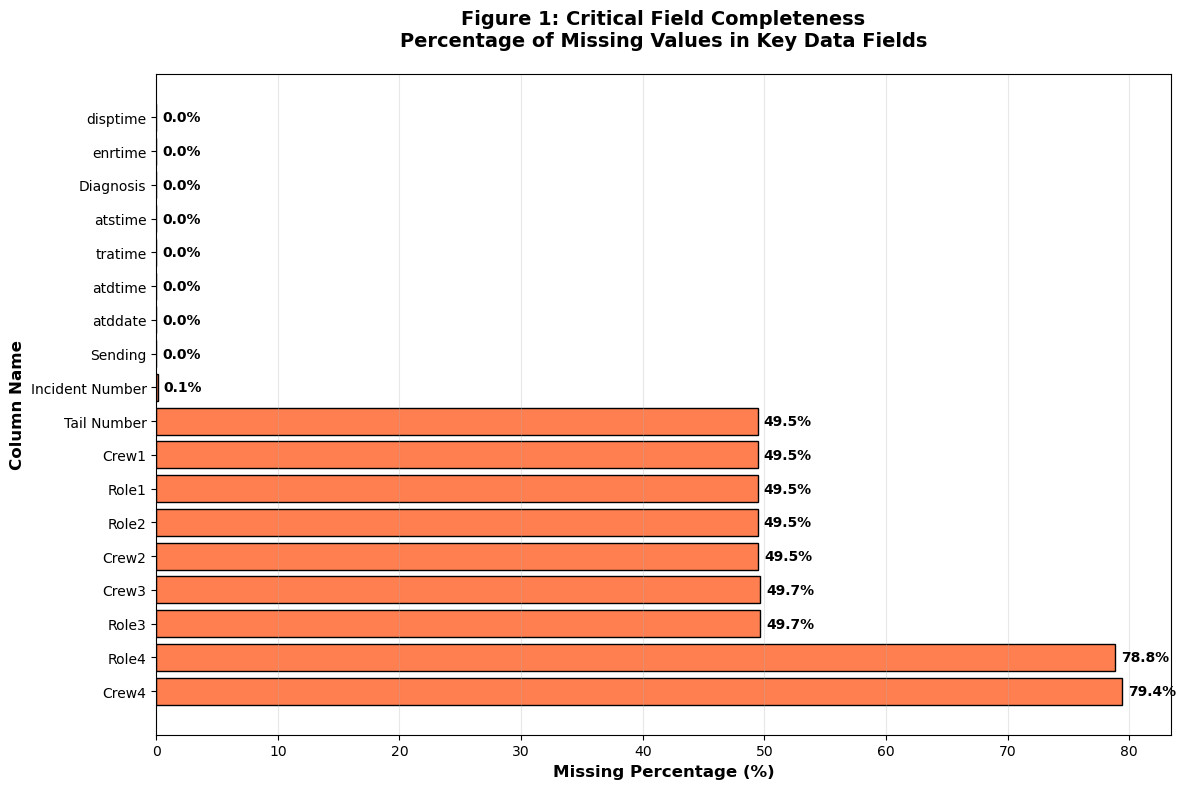

In [57]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
}).sort_values('Missing Percentage', ascending=False)


missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) > 0:
    plt.figure(figsize=(12, 8))
    bars = plt.barh(missing_df['Column'], missing_df['Missing Percentage'], 
                    color='coral', edgecolor='black')
    plt.xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    plt.ylabel('Column Name', fontsize=12, fontweight='bold')
    plt.title('Figure 1: Critical Field Completeness\nPercentage of Missing Values in Key Data Fields', 
              fontsize=14, fontweight='bold', pad=20)
    plt.grid(axis='x', alpha=0.3)
    

    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## Data Quality Assessment

### Dataset Overview
- **Size:** 18,382 records × 29 features
- **Scope:** Completed missions only

### Data Types
- **Numerical:** `Mileage - Loaded` (float)
- **Temporal:** Timestamp fields (object) → need datetime conversion
- **Categorical:** All other features

### Feature Types by Cardinality

**Low Cardinality** (few unique values):
- `Call Type`, `veh`, `Status`, `PU City`, `PU STATE`

**High Cardinality** (many unique values):
- `Diagnosis`

### Analysis Dimensions

1. **Temporal:** Trends, patterns, peak periods
2. **Categorical:** Mission types, vehicle usage, diagnosis patterns
3. **Geographic:** City/state distribution, service coverage

## Descriptive Statistics

In [59]:
total_missions = df['yearwithrc'].nunique() if 'yearwithrc' in df.columns else len(df)
total_cities = df['PU City'].nunique() if 'PU City' in df.columns else 0

# Time range analysis
if 'tdate' in df.columns:
    df['tdate'] = pd.to_datetime(df['tdate'], errors='coerce')
    date_range = df['tdate'].dropna()
    if len(date_range) > 0:
        min_date = date_range.min()
        max_date = date_range.max()
        date_span = (max_date - min_date).days
        years_covered = date_span / 365.25
        
        # Calculate average daily/monthly mission volume
        daily_avg = total_missions / max(date_span, 1)
        monthly_avg = total_missions / max(years_covered * 12, 1)
        
        print(f"\nTotal Missions: {total_missions:,}")
        print(f"Total Cities Covered: {total_cities}")
        print(f"\nTime Range:")
        print(f"  Start Date: {min_date.strftime('%Y-%m-%d')}")
        print(f"  End Date: {max_date.strftime('%Y-%m-%d')}")
        print(f"  Days Covered: {date_span:,} days")
        print(f"  Years Covered: {years_covered:.2f} years")
        print(f"\nAverage Mission Volume:")
        print(f"  Daily Average: {daily_avg:.2f}")
        print(f"  Monthly Average: {monthly_avg:.2f}")


Total Missions: 18,380
Total Cities Covered: 401

Time Range:
  Start Date: 2012-07-01
  End Date: 2023-12-31
  Days Covered: 4,200 days
  Years Covered: 11.50 years

Average Mission Volume:
  Daily Average: 4.38
  Monthly Average: 133.20


## 2 Temporal Analysis

In [60]:
import re
def extract_hour_minute(time_str):
    if pd.isna(time_str) or time_str == '':
        return None
    
    time_str = str(time_str).strip()
    
    pattern = r'^(\d{1,2}):(\d{2})(?::\d{2})?$'
    match = re.match(pattern, time_str)
    
    if match:
        hour = int(match.group(1))
        minute = int(match.group(2))
        # Format as HH:MM
        return f"{hour:02d}:{minute:02d}"
    
    return None

df_clean['disptime'] = df_clean['disptime'].apply(extract_hour_minute)
df_clean['enrtime'] = df_clean['enrtime'].apply(extract_hour_minute)

Figure 3: Distribution of Response Time


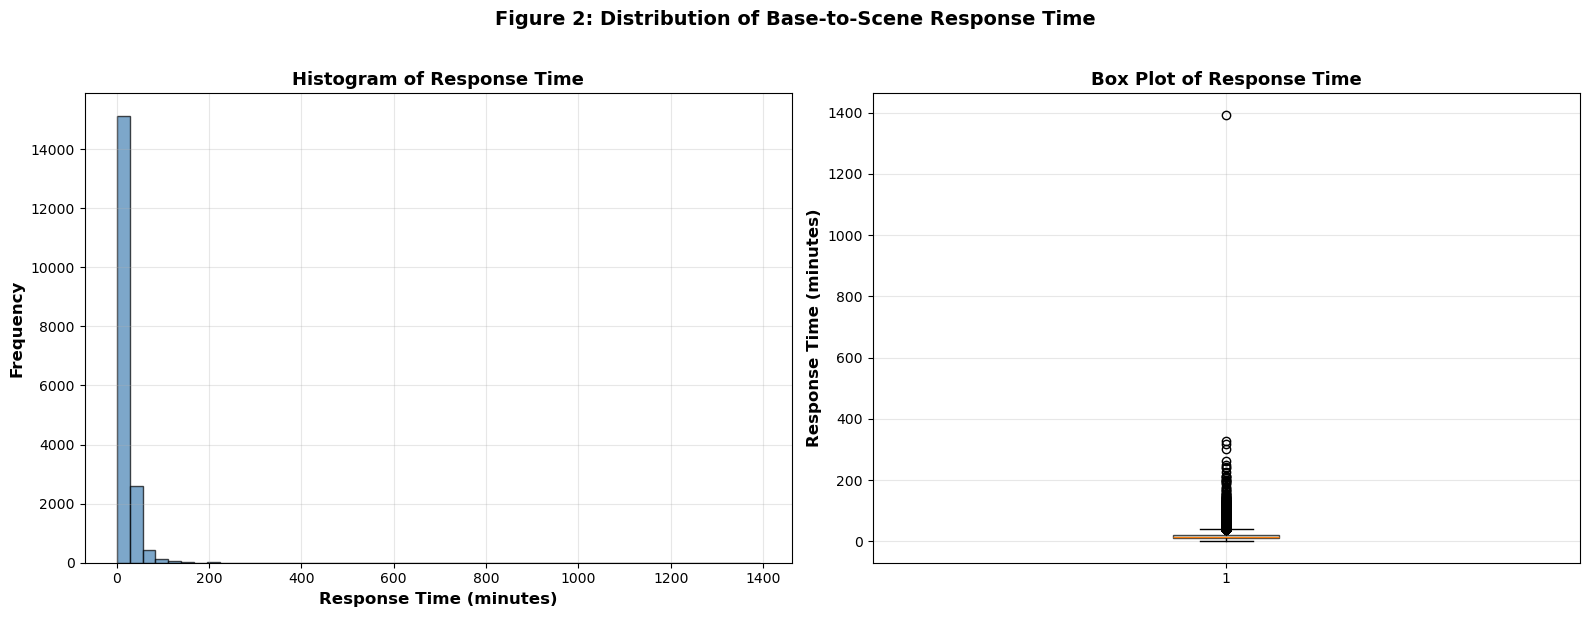


Response Time Statistics:
  Mean Response Time: 19.08 minutes
  Median Response Time: 15.00 minutes
  Min Response Time: 0.00 minutes
  Max Response Time: 1393.00 minutes
  Standard Deviation: 20.22 minutes


In [61]:
# Figure 2: Distribution of Response Time 

print("Figure 3: Distribution of Response Time")

if 'disptime' in df.columns and 'enrtime' in df.columns and 'tdate' in df.columns:
    df_clean = df.copy()
    df_clean['tdate'] = pd.to_datetime(df_clean['tdate'], errors='coerce')
    
    def normalize_time(time_str):
        if pd.isna(time_str) or time_str == '':
            return None
        time_str = str(time_str).strip()
        if ':' in time_str:
            parts = time_str.split(':')
            if len(parts) >= 2:
                hour = parts[0].zfill(2)  
                minute = parts[1][:2]      
                return f"{hour}:{minute}"
        return None
    
    df_clean['disptime'] = df_clean['disptime'].apply(normalize_time)
    df_clean['enrtime'] = df_clean['enrtime'].apply(normalize_time)
    
    df_clean['disptime_dt'] = pd.to_datetime(
        df_clean['tdate'].astype(str) + ' ' + df_clean['disptime'], 
        format='%Y-%m-%d %H:%M', errors='coerce'
    )
    df_clean['enrtime_dt'] = pd.to_datetime(
        df_clean['tdate'].astype(str) + ' ' + df_clean['enrtime'], 
        format='%Y-%m-%d %H:%M', errors='coerce'
    )
    
    
    # Calculate response time (in minutes)
    response_times = []
    for idx, row in df_clean.iterrows():
        if pd.notna(row['disptime_dt']) and pd.notna(row['enrtime_dt']):
            if row['enrtime_dt'] < row['disptime_dt']:
                # Assume it's the next day
                response_time = (row['enrtime_dt'] + pd.Timedelta(days=1) - row['disptime_dt']).total_seconds() / 60
            else:
                response_time = (row['enrtime_dt'] - row['disptime_dt']).total_seconds() / 60
            response_times.append(response_time)
    
    if len(response_times) > 0:
        response_times = [rt for rt in response_times if 0 <= rt <= 1440]  # Filter outliers
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Histogram
        axes[0].hist(response_times, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[0].set_xlabel('Response Time (minutes)', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
        axes[0].set_title('Histogram of Response Time', fontsize=13, fontweight='bold')
        axes[0].grid(alpha=0.3)
        
        # Box plot
        axes[1].boxplot(response_times, vert=True, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', alpha=0.7))
        axes[1].set_ylabel('Response Time (minutes)', fontsize=12, fontweight='bold')
        axes[1].set_title('Box Plot of Response Time', fontsize=13, fontweight='bold')
        axes[1].grid(alpha=0.3)
        
        plt.suptitle('Figure 2: Distribution of Base-to-Scene Response Time', 
                     fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
        
        print(f"\nResponse Time Statistics:")
        print(f"  Mean Response Time: {np.mean(response_times):.2f} minutes")
        print(f"  Median Response Time: {np.median(response_times):.2f} minutes")
        print(f"  Min Response Time: {np.min(response_times):.2f} minutes")
        print(f"  Max Response Time: {np.max(response_times):.2f} minutes")
        print(f"  Standard Deviation: {np.std(response_times):.2f} minutes")

Figure 3: Average Missions by Month and Day of Week


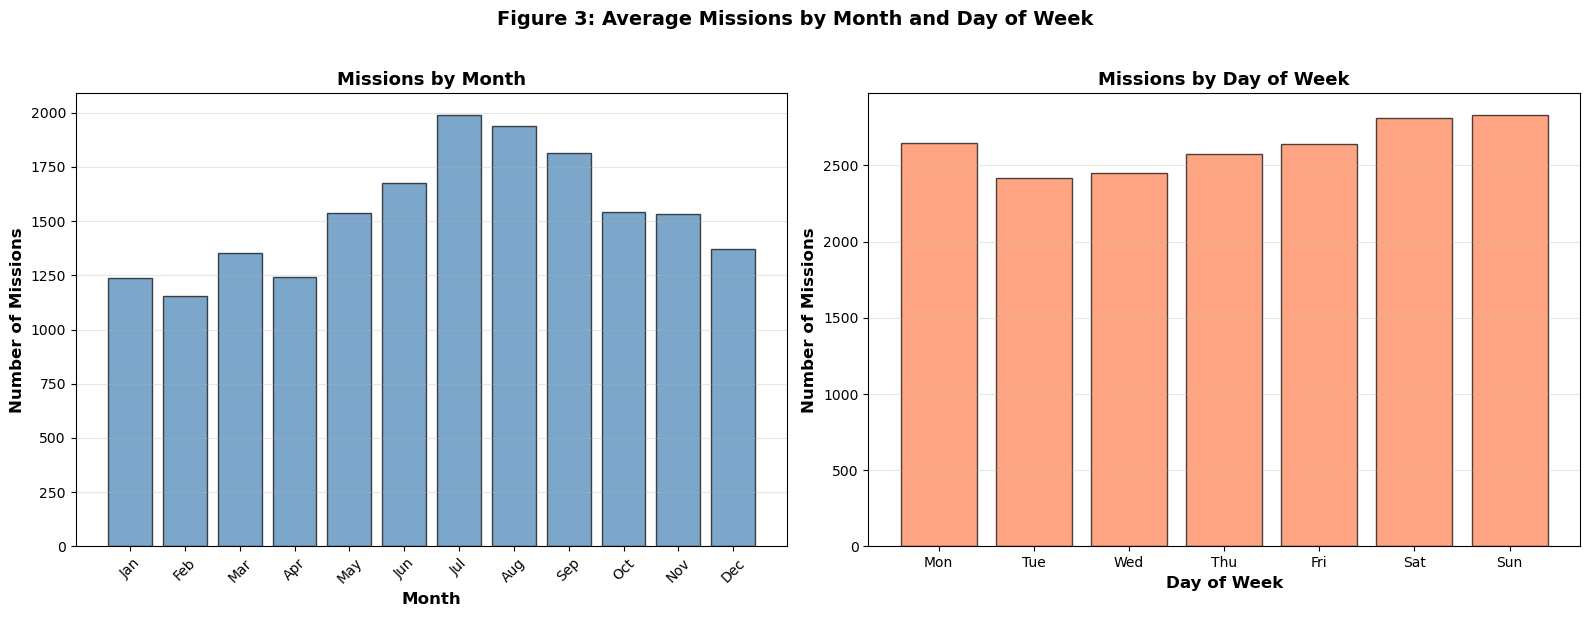

In [62]:
# Figure 3: Average Missions by Month and Day of Week
print("Figure 3: Average Missions by Month and Day of Week")

if 'tdate' in df.columns:
    df['tdate'] = pd.to_datetime(df['tdate'], errors='coerce')
    df = df[df['tdate'].notna()]
    
    df['Month'] = df['tdate'].dt.month
    df['DayOfWeek'] = df['tdate'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['DayName'] = df['tdate'].dt.day_name()
    
    # Statistics by month
    monthly_counts = df.groupby('Month').size()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Statistics by day of week
    daily_counts = df.groupby('DayOfWeek').size()
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Monthly bar chart
    axes[0].bar(range(1, 13), [monthly_counts.get(i, 0) for i in range(1, 13)], 
                color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_xticks(range(1, 13))
    axes[0].set_xticklabels(month_names, rotation=45)
    axes[0].set_xlabel('Month', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Number of Missions', fontsize=12, fontweight='bold')
    axes[0].set_title('Missions by Month', fontsize=13, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Day of week bar chart
    axes[1].bar(range(7), [daily_counts.get(i, 0) for i in range(7)], 
                color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_xticks(range(7))
    axes[1].set_xticklabels(day_names)
    axes[1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Number of Missions', fontsize=12, fontweight='bold')
    axes[1].set_title('Missions by Day of Week', fontsize=13, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.suptitle('Figure 3: Average Missions by Month and Day of Week', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

Figure 4: Seasonal and Hourly Patterns


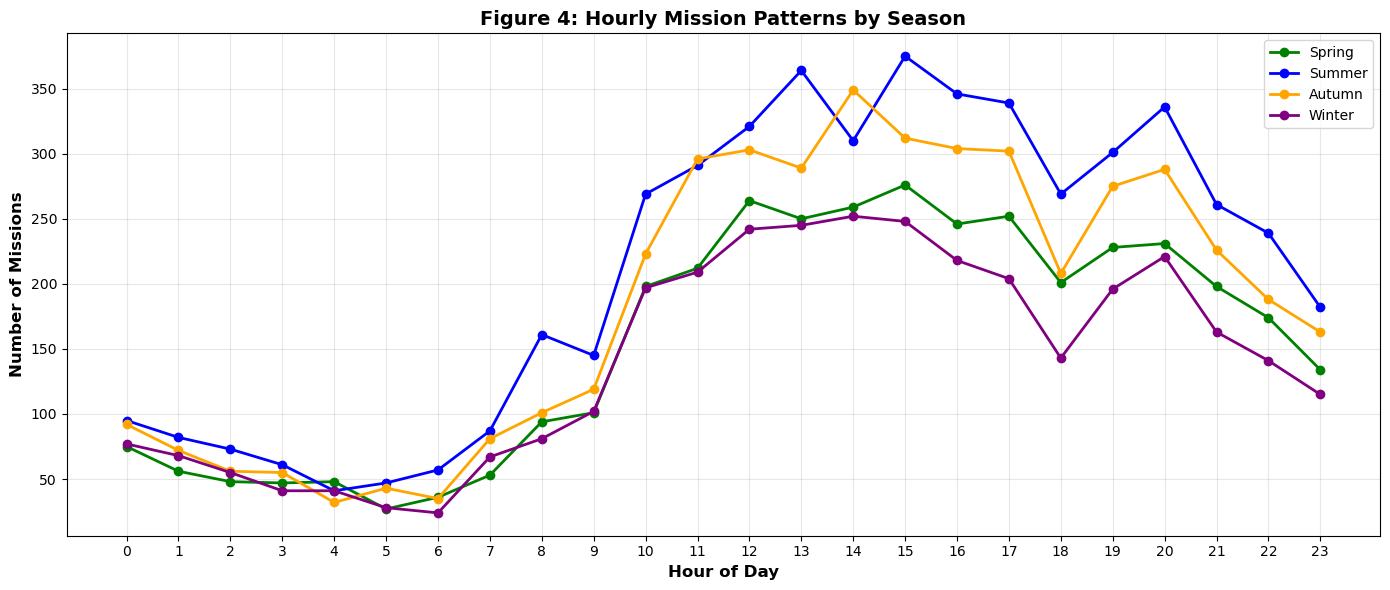

In [63]:
# Analysis by season and hour
print("Figure 4: Seasonal and Hourly Patterns")


if 'tdate' in df.columns and 'enrtime' in df.columns:
    # Add season
    def get_season(month):
        if month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Autumn'
        else:
            return 'Winter'
    
    df['season'] = df['Month'].apply(get_season)
    
    # Process time
    df['enrtime'] = df['enrtime'].astype(str).str[:5]
    df['enr_hour'] = pd.to_datetime(df['enrtime'], format='%H:%M', errors='coerce').dt.hour
    df = df[df['enr_hour'].notna()]
    
    # Group by season and hour
    seasonal_hourly = df.groupby(['season', 'enr_hour']).size().reset_index(name='count')
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
    colors = ['green', 'blue', 'orange', 'purple']
    
    for season, color in zip(seasons, colors):
        season_data = seasonal_hourly[seasonal_hourly['season'] == season]
        ax.plot(season_data['enr_hour'], season_data['count'], 
               marker='o', label=season, color=color, linewidth=2, markersize=6)
    
    ax.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Missions', fontsize=12, fontweight='bold')
    ax.set_title('Figure 4: Hourly Mission Patterns by Season', fontsize=14, fontweight='bold')
    ax.set_xticks(range(0, 24))
    ax.legend()
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

## 3 Categorical Variables

In [64]:
if 'veh' in df.columns:
    print(f"\nVehicle Type Distribution:")
    print(df['veh'].value_counts())


Vehicle Type Distribution:
veh
LF1    6668
LF2    5902
LF3    2098
LF4    1882
Name: count, dtype: int64


Figure 5: Asset Utilization Rate by Vehicle


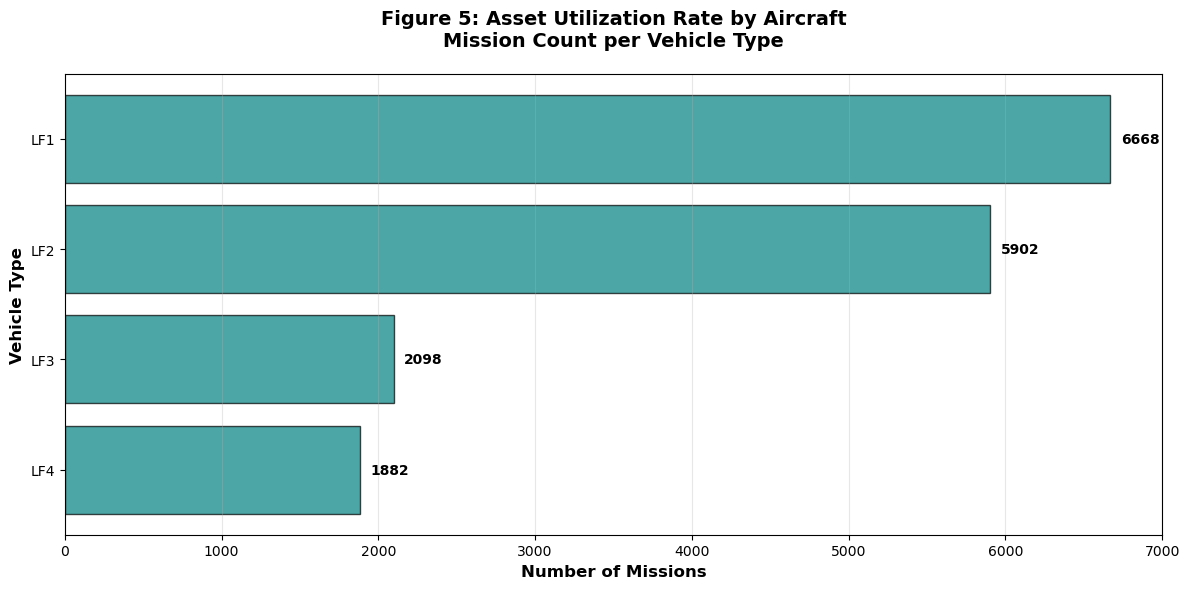


Vehicle Usage Statistics:
veh
LF1    6668
LF2    5902
LF3    2098
LF4    1882
Name: count, dtype: int64

Utilization Percentage:
  LF1: 40.29%
  LF2: 35.66%
  LF3: 12.68%
  LF4: 11.37%


In [65]:
# Figure 5: Asset Utilization Rate by Vehicle

print("Figure 5: Asset Utilization Rate by Vehicle")


if 'veh' in df.columns:
    vehicle_counts = df['veh'].value_counts()
    
    plt.figure(figsize=(12, 6))
    bars = plt.barh(range(len(vehicle_counts)), vehicle_counts.values, 
                    color='teal', edgecolor='black', alpha=0.7)
    plt.yticks(range(len(vehicle_counts)), vehicle_counts.index)
    plt.xlabel('Number of Missions', fontsize=12, fontweight='bold')
    plt.ylabel('Vehicle Type', fontsize=12, fontweight='bold')
    plt.title('Figure 5: Asset Utilization Rate by Aircraft\nMission Count per Vehicle Type', 
              fontsize=14, fontweight='bold', pad=20)
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + max(vehicle_counts.values) * 0.01, bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', ha='left', va='center', fontweight='bold')
    
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nVehicle Usage Statistics:")
    print(vehicle_counts)
    
    # Calculate utilization percentage
    total = vehicle_counts.sum()
    utilization_pct = (vehicle_counts / total * 100).round(2)
    print("\nUtilization Percentage:")
    for veh, pct in utilization_pct.items():
        print(f"  {veh}: {pct}%")

## 4 Geographic Analysis

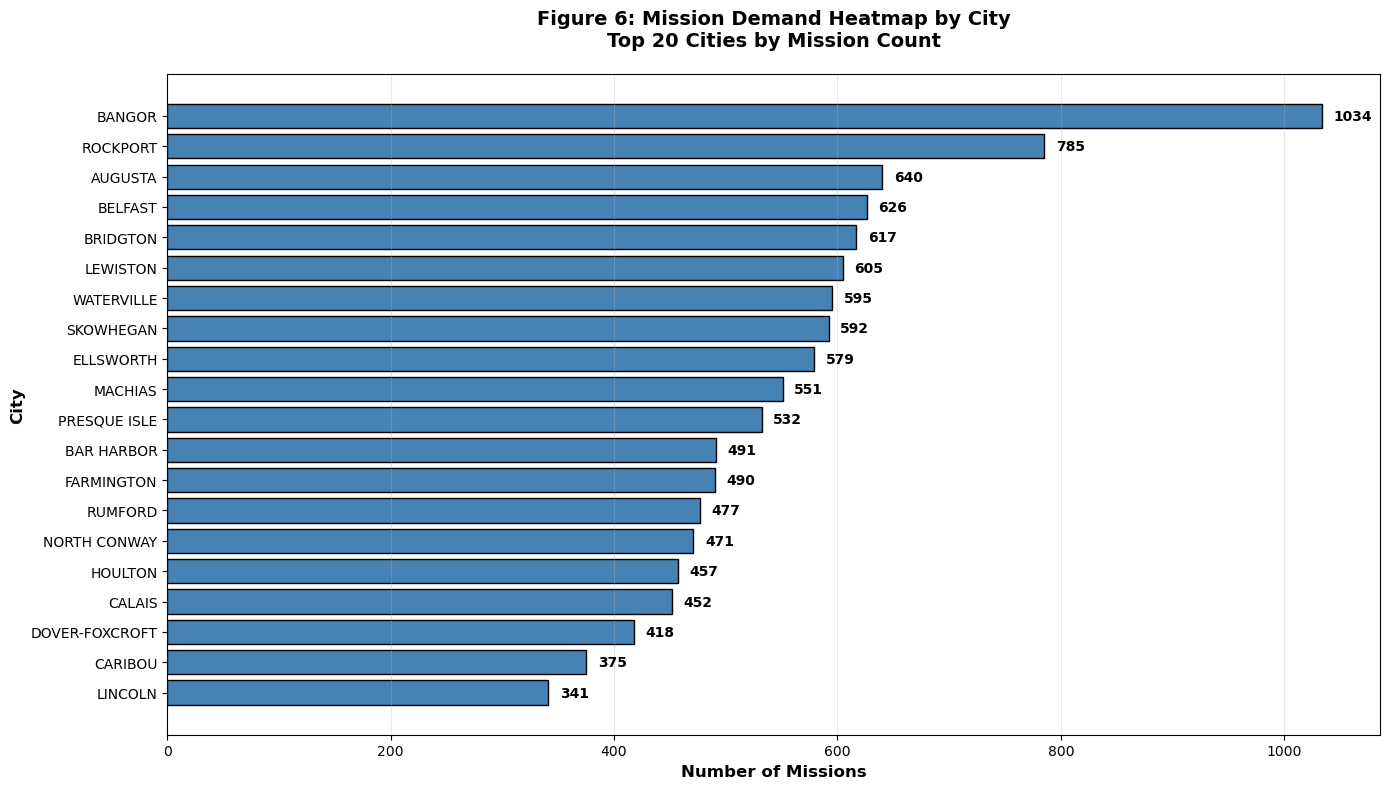


Total Number of Cities: 396

Top 10 Cities:
PU City
BANGOR        1034
ROCKPORT       785
AUGUSTA        640
BELFAST        626
BRIDGTON       617
LEWISTON       605
WATERVILLE     595
SKOWHEGAN      592
ELLSWORTH      579
MACHIAS        551
Name: count, dtype: int64


In [66]:
if 'PU City' in df.columns:
    city_counts = df['PU City'].value_counts().head(20)  # Top 20 cities
    
    plt.figure(figsize=(14, 8))
    bars = plt.barh(range(len(city_counts)), city_counts.values, 
                    color='steelblue', edgecolor='black')
    plt.yticks(range(len(city_counts)), city_counts.index)
    plt.xlabel('Number of Missions', fontsize=12, fontweight='bold')
    plt.ylabel('City', fontsize=12, fontweight='bold')
    plt.title('Figure 6: Mission Demand Heatmap by City\nTop 20 Cities by Mission Count', 
              fontsize=14, fontweight='bold', pad=20)
    plt.grid(axis='x', alpha=0.3)
    

    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + max(city_counts.values) * 0.01, bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', ha='left', va='center', fontweight='bold')
    
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal Number of Cities: {df['PU City'].nunique()}")
    print(f"\nTop 10 Cities:")
    print(city_counts.head(10))